https://colab.research.google.com/drive/17KY5mr2uWJTTcPdvdyNjCxjT36HjS-FJ

In [15]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

from sklearn.metrics import classification_report, confusion_matrix

# Загрузка и подготовка данных

In [16]:
wcd_df = pd.DataFrame
wcd_df = pd.read_csv('../data/wholesale_customers_data_preprocessed.csv' )
wcd_df.head()

,Unnamed: 0,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_Lisbon,Region_Oporto,Other Region
0,0,1,12669,9656,7561,214,2674,1338,0,0,1
1,1,1,7057,9810,9568,1762,3293,1776,0,0,1
2,2,1,6353,8808,7684,2405,3516,7844,0,0,1
3,3,0,13265,1196,4221,6404,507,1788,0,0,1
4,4,1,22615,5410,7198,3915,1777,5185,0,0,1


In [17]:
del wcd_df['Unnamed: 0']

In [18]:
wcd_df['Channel'].unique()

array([1, 0])

In [19]:
X = wcd_df.iloc[:, 1: ].values
y = wcd_df.iloc[:, 0].values
print(X)

[[12669  9656  7561 ...     0     0     1]
 [ 7057  9810  9568 ...     0     0     1]
 [ 6353  8808  7684 ...     0     0     1]
 ...
 [14531 15488 30243 ...     0     0     1]
 [10290  1981  2232 ...     0     0     1]
 [ 2787  1698  2510 ...     0     0     1]]


In [20]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

print(Counter(y_train).values())
print(Counter(y_test).values())

dict_values([238, 114])
dict_values([60, 28])


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Обучение

## 1 модель

In [22]:
model_1 = Sequential()
model_1.add(Dense(8, input_dim=len(X_train[0]), activation='relu'))

model_1.add(Dense(1, activation='sigmoid'))

In [23]:
print(model_1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 80        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________
None


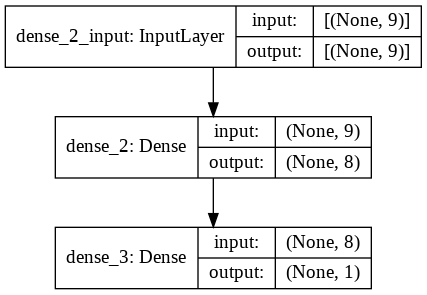

In [24]:
plot_model(model_1, to_file='model_plot_1.png', show_shapes=True, show_layer_names=True)

In [25]:
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])

In [ ]:
model_1.fit(X_train, y_train, epochs=200, batch_size=10)

In [27]:
_, accuracy, precision, recall = model_1.evaluate(X_test, y_test)
print('Accuracy: %.2f, %.2f, %.2f,' % (accuracy*100, precision*100, recall*100))

3/3 [==============================] - 1s 4ms/step - loss: 0.1338 - accuracy: 0.9545 - precision: 0.8750 - recall: 1.0000
Accuracy: 95.45, 87.50, 100.00,


In [28]:
predictions_1 = (model_1.predict(X_test) > 0.5).astype("int32")
for i in range(10):
	print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions_1[i], y_test[i]))

[-0.9439955608678694, -0.2999889277133304, -0.14823692274201672, 0.854564169524556, -0.4800510359598932, -0.22814078130893428, -0.4623776632237728, -0.3216337604513384, 0.607988326736188] => 0 (expected 0)
[1.4230208141511156, -0.46242111723508206, 0.0323400026956124, -0.01419691391691018, -0.5125353719419363, -0.4851677795340514, -0.4623776632237728, 3.1091263510296048, -1.6447684207494768] => 0 (expected 0)
[-0.4193197546616417, -0.5869697609578309, -0.5956503461232363, -0.08530202489438968, -0.5717473261370528, -0.17355975851981675, -0.4623776632237728, 3.1091263510296048, -1.6447684207494768] => 0 (expected 0)
[-0.719228047007916, 0.4347183320803434, -0.578398431622044, -0.4534211280475533, -0.526721569301183, 0.014331277505751451, -0.4623776632237728, -0.3216337604513384, 0.607988326736188] => 0 (expected 0)
[-0.9912245686964175, 0.3824338493508978, -0.42808983521944083, -0.5768379010520613, -0.3704678012862921, -0.5228783043701689, -0.4623776632237728, -0.3216337604513384, 0.6079

In [29]:
print(confusion_matrix(y_test, predictions_1))
print(classification_report(y_test, predictions_1))

[[56  4]
 [ 0 28]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        60
           1       0.88      1.00      0.93        28

    accuracy                           0.95        88
   macro avg       0.94      0.97      0.95        88
weighted avg       0.96      0.95      0.96        88



## 2 модель

Во второй модели увеличим количество слоев и изменим оптимизатор

In [30]:
model_2 = Sequential()
model_2.add(Dense(9, input_dim=len(X_train[0]), activation='relu'))
model_2.add(Dense(9, input_dim=9, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

In [31]:
print(model_2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 10        
Total params: 190
Trainable params: 190
Non-trainable params: 0
_________________________________________________________________
None


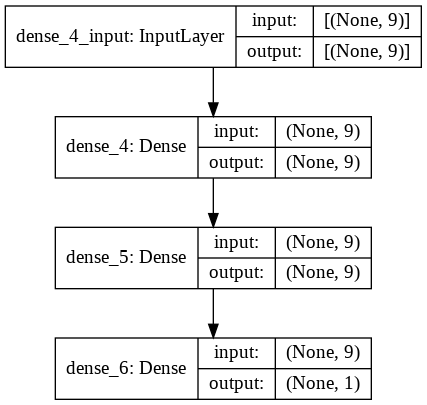

In [32]:
plot_model(model_2, to_file='model_plot_2.png', show_shapes=True, show_layer_names=True)

In [33]:
model_2.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy', 'Precision', 'Recall'])

In [ ]:
model_2.fit(X_train, y_train, epochs=200, batch_size=10)

In [35]:
_, accuracy, precision, recall = model_2.evaluate(X_test, y_test)
print('Accuracy: %.2f, %.2f, %.2f,' % (accuracy*100, precision*100, recall*100))

3/3 [==============================] - 1s 4ms/step - loss: 0.1802 - accuracy: 0.9318 - precision: 0.8235 - recall: 1.0000
Accuracy: 93.18, 82.35, 100.00,


In [36]:
predictions_2 = (model_2.predict(X_test) > 0.5).astype("int32")
for i in range(10):
	print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions_2[i], y_test[i]))

[-0.9439955608678694, -0.2999889277133304, -0.14823692274201672, 0.854564169524556, -0.4800510359598932, -0.22814078130893428, -0.4623776632237728, -0.3216337604513384, 0.607988326736188] => 0 (expected 0)
[1.4230208141511156, -0.46242111723508206, 0.0323400026956124, -0.01419691391691018, -0.5125353719419363, -0.4851677795340514, -0.4623776632237728, 3.1091263510296048, -1.6447684207494768] => 0 (expected 0)
[-0.4193197546616417, -0.5869697609578309, -0.5956503461232363, -0.08530202489438968, -0.5717473261370528, -0.17355975851981675, -0.4623776632237728, 3.1091263510296048, -1.6447684207494768] => 0 (expected 0)
[-0.719228047007916, 0.4347183320803434, -0.578398431622044, -0.4534211280475533, -0.526721569301183, 0.014331277505751451, -0.4623776632237728, -0.3216337604513384, 0.607988326736188] => 0 (expected 0)
[-0.9912245686964175, 0.3824338493508978, -0.42808983521944083, -0.5768379010520613, -0.3704678012862921, -0.5228783043701689, -0.4623776632237728, -0.3216337604513384, 0.6079

In [37]:
print(confusion_matrix(y_test, predictions_2))
print(classification_report(y_test, predictions_2))

[[54  6]
 [ 0 28]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        60
           1       0.82      1.00      0.90        28

    accuracy                           0.93        88
   macro avg       0.91      0.95      0.93        88
weighted avg       0.94      0.93      0.93        88



## 3 модель

В 3 моделе изменим оптимизатор и увеличим количество эпох обучения

In [54]:
model_3 = Sequential()
model_3.add(Dense(9, input_dim=len(X_train[0]), activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

In [55]:
print(model_3.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 10        
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________
None


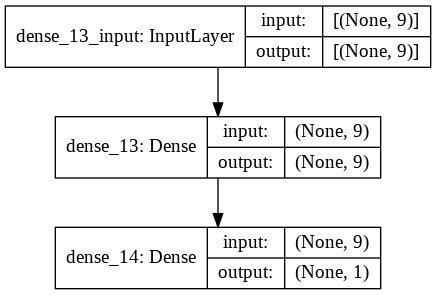

In [56]:
plot_model(model_3, to_file='model_plot_3.png', show_shapes=True, show_layer_names=True)

In [57]:
model_3.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy', 'Precision', 'Recall'])

In [ ]:
model_3.fit(X_train, y_train, epochs=300, batch_size=10)

In [59]:
_, accuracy, precision, recall = model_3.evaluate(X_test, y_test)
print('Accuracy: %.2f, %.2f, %.2f,' % (accuracy*100, precision*100, recall*100))

3/3 [==============================] - 1s 6ms/step - loss: 0.1543 - accuracy: 0.9205 - precision: 0.8387 - recall: 0.9286
Accuracy: 92.05, 83.87, 92.86,


In [60]:
predictions_3 = (model_3.predict(X_test) > 0.5).astype("int32")
for i in range(10):
	print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions_3[i], y_test[i]))

[-0.9439955608678694, -0.2999889277133304, -0.14823692274201672, 0.854564169524556, -0.4800510359598932, -0.22814078130893428, -0.4623776632237728, -0.3216337604513384, 0.607988326736188] => 0 (expected 0)
[1.4230208141511156, -0.46242111723508206, 0.0323400026956124, -0.01419691391691018, -0.5125353719419363, -0.4851677795340514, -0.4623776632237728, 3.1091263510296048, -1.6447684207494768] => 0 (expected 0)
[-0.4193197546616417, -0.5869697609578309, -0.5956503461232363, -0.08530202489438968, -0.5717473261370528, -0.17355975851981675, -0.4623776632237728, 3.1091263510296048, -1.6447684207494768] => 0 (expected 0)
[-0.719228047007916, 0.4347183320803434, -0.578398431622044, -0.4534211280475533, -0.526721569301183, 0.014331277505751451, -0.4623776632237728, -0.3216337604513384, 0.607988326736188] => 0 (expected 0)
[-0.9912245686964175, 0.3824338493508978, -0.42808983521944083, -0.5768379010520613, -0.3704678012862921, -0.5228783043701689, -0.4623776632237728, -0.3216337604513384, 0.6079

In [61]:
print(confusion_matrix(y_test, predictions_3))
print(classification_report(y_test, predictions_3))

[[55  5]
 [ 2 26]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        60
           1       0.84      0.93      0.88        28

    accuracy                           0.92        88
   macro avg       0.90      0.92      0.91        88
weighted avg       0.92      0.92      0.92        88



# Выводы

Лучшие оценки качества были получены на первой модели. Классические модели ошибались в среднем на 8 объектах, в то время как нейронная сеть ошибается лишь на 4 объектах с долей правильных ответов, равной 95.45.